In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('online_retail_II.csv',encoding='ISO-8859-1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Information feature:
+ Invoice: Mã hoá đơn
+ StockCode: Nhãn hàng
+ Description: Mô tả
+ Quantity: số lượng đơn hàng
+ InvoiceDate: Ngày xuất hoá đơn
+ Price: Giá / 1 sản phẩm
+ Customer ID: ID khách hàng
+ Country: Quốc gia đặt hàng


# Analytical Process:
1. Define problem/ASK:
2. Data preparation
3. Data processing: 
    + clean data: wrong data, missing, outlier
    + recode data: encoder/get dummies
4. Data analysis:
    + Descriptive analysis:
        - Quantitative feature: mean, max, min, std, distribution
        - Quanlitative feature: freq, percentage
    + Inferential analysis:
        - Correlation
        - Regression/Classification


# Define problem:
0. Customer:
    + Số lượng khách hàng truy cập và thực hiện mua hàng (coversion: sum, mean)
    + Số người mua bỏ đặt hàng trong quá trình mua (abandonment: Y/N)
    + Số lượng người mua mới ???
    
1. Xác định tổng doanh thu trên:
    + 1 customer (revenue_per_customer): sum,mean
    + Mỗi quốc gia: freq,percentage
    + Mỗi tháng, 6 tháng, năm: freq

2. Xác định số lượng đơn hàng:
    + Theo thời gian: freq, percentage
    + trên mỗi customer: sum
    + trên mỗi quốc gia: freq
    + Số lượng đơn hàng/khách hàng mua mỗi năm/ tháng là bao nhiêu ?? ==> Xác định mô hình doanh nghiệp


# View Data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.rename(columns={'Customer ID':'CustomerID'},inplace=True)

In [5]:
df[df['Price']<0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [6]:
df_abandons_order = df[df['Quantity']<0]
df_abandons_order['Quantity'] = abs(df_abandons_order['Quantity'])
df_abandons_order.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4532\2505376455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abandons_order['Quantity'] = abs(df_abandons_order['Quantity'])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
141,C536379,D,Discount,1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [7]:
df['Description'].value_counts().sort_values(ascending=True).head(50)

PINK BERTIE MOBILE PHONE CHARM         1
FLAMINGO LIGHTS                        1
RUBY GLASS CLUSTER NECKLACE            1
ASSORTED TUTTI FRUTTI ROUND BOX        1
LIGHT DECORATION BATTERY OPERATED      1
dotcom sales                           1
wrongly marked                         1
PINK LARGE JEWELED PHOTOFRAME          1
SET 10 CARDS CHRISTMAS BAUBLE 16954    1
mouldy, thrown away.                   1
SET 10 CARDS TRIANGLE ICONS  17220     1
BLUE CRYSTAL BOOT PHONE CHARM          1
PINK POLKADOT KIDS BAG                 1
Damages                                1
PINK DOLLY HAIR CLIPS                  1
Wrongly mrked had 85123a in box        1
VINTAGE GOLD TINSEL REEL               1
dotcomstock                            1
*Boombox Ipod Classic                  1
Amazon sold sets                       1
LETTER "U" BLING KEY RING              1
???                                    1
lost??                                 1
wet?                                   1
SET 10 CARDS SWI

In [8]:
def data_info(df):
    print("Số lượng khách hàng: ", df["CustomerID"].nunique(),
        '\n ==================================')
    print("Số lượng đơn hàng đã được đặt: ",df['Quantity'].sum(),
        '\n ==================================')
    print("Số hoá đơn đã xuất: ",df['Invoice'].nunique(),
        '\n ==================================')
    print("Số quốc gia đặt hàng: ",df['Country'].nunique(),
        '\n ==================================')
    print("Tổng doanh thu: ",(df['Quantity']*df['Price']).sum().astype(int),
        '\n ==================================')
    print("Số đơn được trả lại: ",df_abandons_order['Invoice'].nunique(),
        '\n ==================================')
    print("Số lượng sản phẩm: ",df['Description'].nunique(),
        '\n ==================================')

In [9]:
data_info(df)

Số lượng khách hàng:  4372 
Số lượng đơn hàng đã được đặt:  5176451 
Số hoá đơn đã xuất:  25900 
Số quốc gia đặt hàng:  38 
Tổng doanh thu:  9747765 
Số đơn được trả lại:  5172 
Số lượng sản phẩm:  4223 


In [10]:
df.sort_values(by='Price',ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom


In [11]:
df.sort_values(by='Price',ascending=True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
345010,567131,21830,damaged,192,9/16/2011 14:13,0.00,NaN,United Kingdom
345008,567129,72127,found box,24,9/16/2011 14:05,0.00,NaN,United Kingdom


In [12]:
df[df['Price'] == 0 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [13]:
df['Description'].describe()

count                                 540456
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: Description, dtype: object

In [14]:
df.shape

(541910, 8)

+ Bộ số liệu gồm 541910 quan sát và 8 thuộc tính
+ Description và CustomerID là 2 thuộc tính có tồn tại missing cần xử lý
+ Có thể thấy 2 thuộc tính Quantity và Price có các giá trị âm, lý do là các đơn hàng được trả lại hoặc thuộc chương trình discount

# Preparation Data:

LOẠI BỎ MISSING VÀ WRONG DATA:

In [15]:
df_abandons_order.dropna(inplace=True)
df_abandons_order = df_abandons_order[df_abandons_order['Quantity']>0]
df_abandons_order = df_abandons_order[df_abandons_order['Price']>0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_4532\1697932451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abandons_order.dropna(inplace=True)


In [16]:
df_abandons_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      8905 non-null   object 
 1   StockCode    8905 non-null   object 
 2   Description  8905 non-null   object 
 3   Quantity     8905 non-null   int64  
 4   InvoiceDate  8905 non-null   object 
 5   Price        8905 non-null   float64
 6   CustomerID   8905 non-null   float64
 7   Country      8905 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 626.1+ KB


In [17]:
data_info(df_abandons_order)

Số lượng khách hàng:  1589 
Số lượng đơn hàng đã được đặt:  274808 
Số hoá đơn đã xuất:  3654 
Số quốc gia đặt hàng:  28 
Tổng doanh thu:  611342 
Số đơn được trả lại:  3654 
Số lượng sản phẩm:  1945 


In [18]:
df.dropna(inplace=True)
df = df[df['Quantity']>0]
df = df[df['Price']>0]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397885 non-null  object 
 1   StockCode    397885 non-null  object 
 2   Description  397885 non-null  object 
 3   Quantity     397885 non-null  int64  
 4   InvoiceDate  397885 non-null  object 
 5   Price        397885 non-null  float64
 6   CustomerID   397885 non-null  float64
 7   Country      397885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [20]:
data_info(df)

Số lượng khách hàng:  4338 
Số lượng đơn hàng đã được đặt:  5167813 
Số hoá đơn đã xuất:  18532 
Số quốc gia đặt hàng:  37 
Tổng doanh thu:  8911425 
Số đơn được trả lại:  3654 
Số lượng sản phẩm:  3877 


Format wrong type feature:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397885 non-null  object 
 1   StockCode    397885 non-null  object 
 2   Description  397885 non-null  object 
 3   Quantity     397885 non-null  int64  
 4   InvoiceDate  397885 non-null  object 
 5   Price        397885 non-null  float64
 6   CustomerID   397885 non-null  float64
 7   Country      397885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


In [25]:
df['Total_price'] = df['Quantity']*df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,day,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


# RFM Analysis:
***Đặt vấn đề***

RFM là viết tắt của:

**Recency:** Được hiểu là từ lúc mua hàng lần cuối cùng đến hiện tại là bao nhiêu ngày ==> khách hàng càng mua hàng gần đây thì càng dễ gắn kết với thương hiệu hơn so với những người lâu rồi không quay lại mua.

**R (days) = now - last_purchase_date**

**Frequency:** Là tần suất mua hàng

**F = total number of orders**

**Monetary:** Là tổng số tiền khách hàng đã bỏ ra để mua hàng (tổng giá trị các đơn hàng của khách hàng)

**M = total money spent**

Có rất nhiều yếu tố ảnh hưởng đến việc phân loại, mô hình RFM sử dụng 3 yếu tố chính là Recency - Frequency - Monetary để phân nhóm khách hàng

Với bộ số liệu trên tôi sẽ chia thành 3 nhóm dưới đây:

**Nhóm khách hàng có giá trị thấp (Low value):** bao gồm các khách hàng đã lâu rồi chưa quay lại mua, số lượng đơn hàng ít và tổng giá trị đơn hàng thấp

**Nhóm khách hàng có giá trị trung bình (Mid Value):** là nhóm khách hàng có 3 chỉ số RFM trung bình, không cao cũng không thấp

**Nhóm khách hàng có giá trị cao (High Value):** là nhóm khách hàng có mua hàng gần đây, số lượng đơn hàng nhiều và có tộng giá trị cao

In [26]:
df_cus0 = df.groupby(by='CustomerID',as_index=False)['Total_price'].sum() # Customer's Monetary

In [27]:
df_cus1 = df.groupby(by='CustomerID',as_index=False)['Invoice'].nunique() # Frequency order

In [28]:
customer = df.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
customer['Recency']= df['InvoiceDate'].max() - customer['InvoiceDate']
customer['Recency'] = customer['Recency'].apply(lambda x: x.days)
customer.drop(columns='InvoiceDate',inplace=True) # Recency

In [29]:
customer['Frequency'] = df_cus1['Invoice']
customer['Monetary'] = df_cus0['Total_price']

In [32]:
customer.reset_index(drop=True,inplace=True)

In [33]:
customer

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2094.88


In [70]:
customer.sort_values(by='Monetary',ascending=False).head()

,CustomerID,Recency,Frequency,Monetary
1689,14646.0,1,73,280206.02
4201,18102.0,0,60,259657.30
3728,17450.0,7,46,194550.79
3008,16446.0,0,2,168472.50
1879,14911.0,0,201,143825.06


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

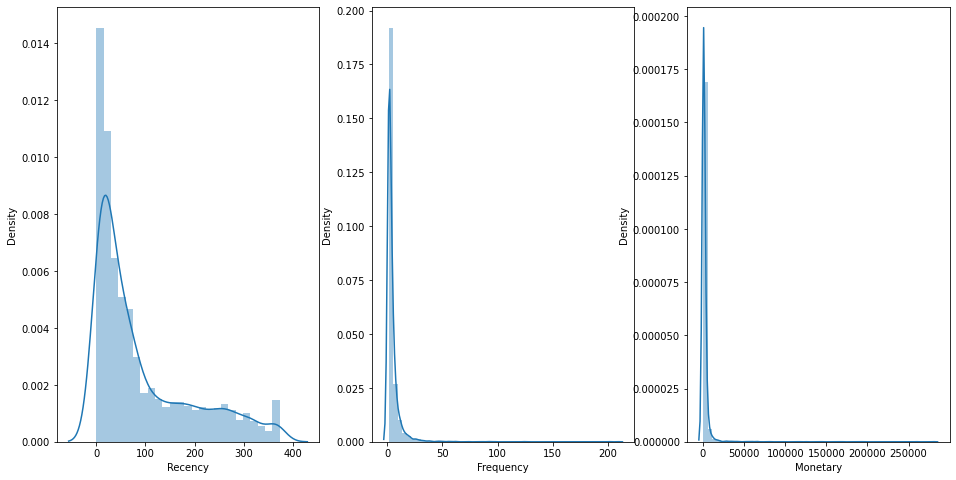

In [74]:
fig,ax = plt.subplots(1,3,figsize=(16,8))
sns.distplot(customer['Recency'],ax =ax[0])
sns.distplot(customer['Frequency'],ax =ax[1])
sns.distplot(customer['Monetary'],ax =ax[2])
plt.show()

In [75]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [68]:
from scipy import stats
def analyze_distribution(x):
    fig, ax = plt.subplots(2, 2, figsize=(18,5))
    sns.distplot(customer[x], ax=ax[0,0])
    sns.distplot(np.log(customer[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customer[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customer[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print('Skewness theo pp log: ',customer[x].skew().round(2),
        '\n =================================')
    print('Skewness theo pp sqrt root: ',np.log(customer[x]).skew().round(2),
        '\n =================================')
    print('Skewness theo pp boxcox: ',pd.Series(stats.boxcox(customer[x])[0]).skew().round(2),
        '\n =================================')


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

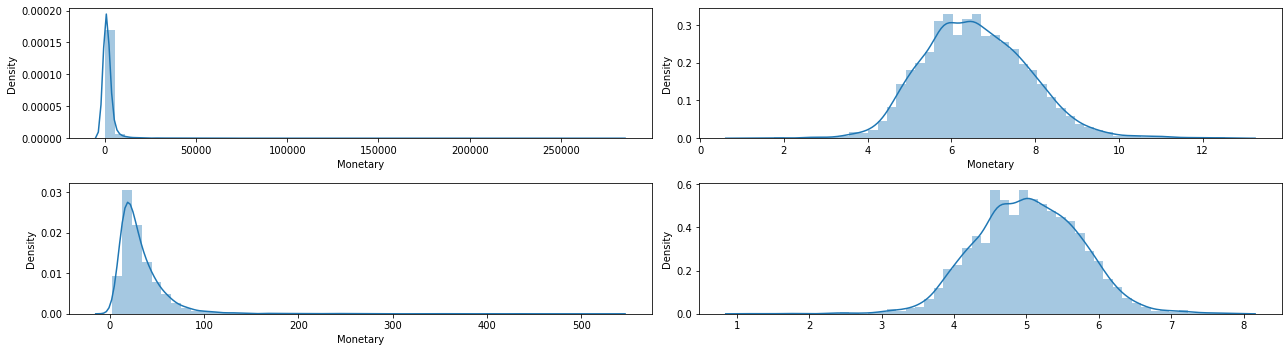

Skewness theo pp log:  19.32 
Skewness theo pp sqrt root:  0.38 
Skewness theo pp boxcox:  -0.02 


In [80]:
analyze_distribution('Monetary')

In [86]:
customer["Recency_Score"] = pd.qcut(customer["Recency"], 3, labels = [2,1,0])
customer["Frequency_Score"] = pd.qcut(customer["Frequency"].rank(method = "first"), 3, labels = [0,1,2])
customer["Monetary_Score"] = pd.qcut(customer["Monetary"], 3, labels = [0,1,2])

In [88]:
customer[customer['Recency_Score'] == 2]

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
1,12347.0,1,7,4310.00,2,2,2
3,12349.0,18,1,1757.55,2,0,2
9,12356.0,22,3,2811.43,2,1,2
11,12358.0,1,2,1168.06,2,1,1
15,12362.0,2,10,5226.23,2,2,2
...,...,...,...,...,...,...,...
4318,18259.0,24,3,2338.60,2,1,2
4327,18272.0,2,6,3078.58,2,2,2
4328,18273.0,1,3,204.00,2,1,0
4335,18282.0,7,2,178.05,2,1,0


In [92]:
customer.groupby(by='Monetary_Score')['Monetary'].mean()

Monetary_Score
0     220.600906
1     712.599732
2    5229.611190
Name: Monetary, dtype: float64